In [ ]:
!pip install pillow


In [ ]:
!pip install tf_keras

In [ ]:
!pip install tensorflow tensorflow-hub numpy

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np


print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)
print("Num py version:", np.__version__)


TF version: 2.18.1
TF Hub version: 0.16.1
Num py version: 2.0.2


The following steps are just to import the dataset. They can be done manually as well in any other way. No need to run them everytime if you have the data ready.

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload your kaggle.json file


{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Now download the dataset
!kaggle datasets download -d sanikamal/rock-paper-scissors-dataset

# Unzip it
!unzip -q rock-paper-scissors-dataset.zip -d Rock-Paper-Scissors

!rm -rf Rock-Paper-Scissors/rock-paper-scissors/


Dataset URL: https://www.kaggle.com/datasets/sanikamal/rock-paper-scissors-dataset
License(s): other
rock-paper-scissors-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Move contents of inner Rock-Paper-Scissors up one level
!mv Rock-Paper-Scissors/Rock-Paper-Scissors/* Rock-Paper-Scissors/

# Remove the now empty inner Rock-Paper-Scissors folder
!rm -rf Rock-Paper-Scissors/Rock-Paper-Scissors


mv: cannot move 'Rock-Paper-Scissors/Rock-Paper-Scissors/test' to 'Rock-Paper-Scissors/test': Directory not empty
mv: cannot move 'Rock-Paper-Scissors/Rock-Paper-Scissors/train' to 'Rock-Paper-Scissors/train': Directory not empty
mv: cannot move 'Rock-Paper-Scissors/Rock-Paper-Scissors/validation' to 'Rock-Paper-Scissors/validation': Directory not empty


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Parameters
BATCH_SIZE = 32
IMG_SIZE = (224, 224)  # MobileNetV2 default input size
DATA_DIR = "Rock-Paper-Scissors"  # path to your dataset folder


In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

IMAGE_SIZE = (224, 224)
NUM_CLASSES = 3

# Define class mapping
class_names = ['paper', 'rock', 'scissors']
label_map = {name: idx for idx, name in enumerate(class_names)}

def load_dataset(base_dir):
    X = []
    Y = []
    for label in class_names:
        folder_path = os.path.join(base_dir, label)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                img = load_img(file_path, target_size=IMAGE_SIZE)
                img_array = img_to_array(img) / 255.0  # Normalize
                X.append(img_array)
                Y.append(label_map[label])
            except:
                print(f"Skipping {file_path}")
    return np.array(X), to_categorical(Y, num_classes=NUM_CLASSES)

# Load training data
train_path = 'Rock-Paper-Scissors/train'
X_train, Y_train = load_dataset(train_path)

# Load validation data
test_path = 'Rock-Paper-Scissors/test'
X_test, Y_test = load_dataset(test_path)


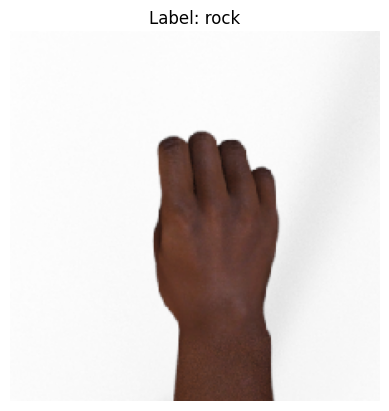

Pixel array (normalized):
[[[0.99215686 0.99215686 0.99215686]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.92941177 0.92941177 0.92941177]
  [0.9372549  0.9372549  0.9372549 ]
  [0.9411765  0.9411765  0.9411765 ]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99215686 0.99215686 0.99215686]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.93333334 0.93333334 0.93333334]
  [0.9411765  0.9411765  0.9411765 ]
  [0.93333334 0.93333334 0.93333334]]

 [[0.99607843 0.99607843 0.99607843]
  [0.9882353  0.9882353  0.9882353 ]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.9372549  0.9372549  0.9372549 ]
  [0.9411765  0.9411765  0.9411765 ]
  [0.93333334 0.93333334 0.93333334]]

 ...

 [[0.9843137  0.9843137  0.9843137 ]
  [0.9882353  0.9882353  0.9882353 ]
  [0.9843137  0.9843137  0.9843137 ]
  ...
  [0.9764706  0.9764706  0.9764706 ]
  [0.98039216 0.98039216 0.98039216]
  [0.98039216 0.98039216 0.98039216]]

 [[0.9882353  0.9882353  0.9882353 ]
  [0.988235

In [ ]:
# Select one image
idx = 1000
img_array = X_train[idx]
label = class_names[np.argmax(Y_train[idx])]

# Plot image and its pixel array
plt.imshow(img_array)
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

print("Pixel array (normalized):")
print(img_array)


In [ ]:
import tf_keras



# Load MobileNetV2 from TensorFlow Hub (without the top classification layer)
mobilenet_v2_feature_vector = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"


IMAGE_SHAPE = (224, 224)



# Build your model
model = tf_keras.Sequential([
    hub.KerasLayer(mobilenet_v2_feature_vector, input_shape=IMAGE_SHAPE + (3,), trainable=False),
    tf_keras.layers.Dense(3, activation= "softmax")  # 3 output classes
])


# Compile it
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_24 (KerasLayer  (None, 1280)              2257984   
 )                                                               
                                                                 
 dense_9 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


Cell below is interupted its not an error.

In [ ]:
epochs = 5

history = model.fit(
    X_train, Y_train,
    epochs=epochs,
    validation_data=(X_test, Y_test)
)


Epoch 1/5
69/79 [=========================>....] - ETA: 10s - loss: 0.0032 - accuracy: 1.0000

KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy = model.evaluate(X_val, Y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


12/12 [==============================] - 14s 1s/step - loss: 0.6454 - accuracy: 0.7312
Test Loss: 0.6454
Test Accuracy: 0.7312


1/1 [==============================] - 0s 48ms/step
[3.9596030e-06 9.9999571e-01 4.0609484e-07]
Predicted class: rock


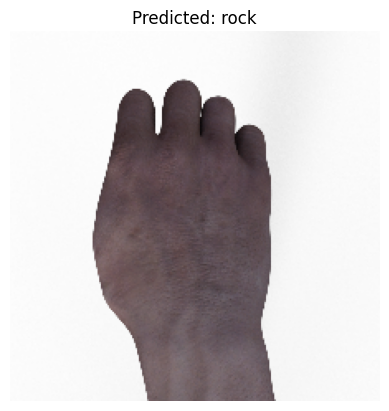

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Your class names in order, based on training folder structure:
class_names = ['paper', 'rock', 'scissors']

# Path to one validation image
img_path = 'Rock-Paper-Scissors/validation/rock-hires2.png'  # replace with actual image name

# Load the image and resize to the model's input size
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to array
img_array = image.img_to_array(img)

# Normalize the image (assuming your model expects values in [0,1])
img_array = img_array / 255.0

# Add batch dimension (model expects batch)
img_array = np.expand_dims(img_array, axis=0)  # shape (1, 224, 224, 3)

# Predict
predictions = model.predict(img_array)  # shape (1, 3)
print(predictions[0])

# Get predicted class index
predicted_class = np.argmax(predictions[0])

print(f"Predicted class: {class_names[predicted_class]}")

# Optional: show the image
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()

